Prediction energy consumption

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

In [4]:
#load dataset
df = pd.read_csv(r"E:\Sort Data\cham4_test_notsort.csv", parse_dates=["time"])
df.sample(10)

,id_floor,time,energy,temperature,humidity,intensity
387876,fl2,2022-10-27 05:43:00+08:00,6.041,31.70,66.64,0.0
75735,fl2,2022-09-23 04:16:00+08:00,5.884,27.47,75.96,0.0
652795,fl1,2022-11-27 22:03:00+08:00,10.396,29.40,77.50,0.0
846486,fl6,2022-11-10 02:33:00+08:00,30.120,28.06,62.16,0.0
253510,fl6,2022-09-24 17:15:00+08:00,27.233,29.26,73.86,8.5
458818,fl4,2022-10-15 12:05:00+08:00,15.036,29.96,60.91,14.0
546200,fl6,2022-10-15 04:27:00+08:00,27.578,30.20,67.54,0.0
1077672,fl4,2022-12-28 00:52:00+08:00,12.786,27.50,54.75,0.0
886230,fl7,2022-11-07 02:58:00+08:00,50.117,30.61,61.39,0.0
472652,fl4,2022-10-25 02:39:00+08:00,15.698,31.13,69.54,0.0


In [5]:
#reanme columns
new_column_names = {'id_floor': 'floor', 'time': 'time','energy':'energy','temperature':'temp','humidity':'humi','intensity':'inten'}   
df.rename(columns=new_column_names, inplace=True)

#add new coulunms
df["month"] = df.apply(lambda x: int(x["time"].month), axis=1)
df["day"] = df.apply(lambda x: int(x["time"].day), axis=1)
df["hour"] = df.apply(lambda x: int(x["time"].hour), axis=1)
df["minute"] = df.apply(lambda x: int(x["time"].minute), axis=1)
df["second"] = df.apply(lambda x: int(x["time"].second), axis=1)
df["dayofweek"] = df.apply(lambda x: int(x["time"].dayofweek), axis=1)
df["dayofyear"] = df.apply(lambda x: int(x["time"].dayofyear), axis=1)

#drop colunms
df.drop(columns='time', inplace=True)

#encoding floor
set_floor = sorted(set(df['floor']))
dict_floor = {x:index+1 for index,x in enumerate(set_floor)}
df['floor'] = df['floor'].replace(dict_floor)

#show dataframe 
df.sample(10)


,floor,energy,temp,humi,inten,month,day,hour,minute,second,dayofweek,dayofyear
671068,2,5.859,29.91,51.12,0.0,11,10,2,36,0,3,314
276270,7,61.335,29.94,62.93,0.0,9,9,20,35,0,4,252
1010083,3,811.151,25.43,49.13,105.0,12,6,15,5,0,1,340
60711,2,124.257,29.10,66.99,0.0,9,12,17,52,0,0,255
1145492,6,58.376,28.32,46.79,0.0,12,19,3,8,0,0,353
1074474,4,11.896,30.42,50.39,0.0,12,25,19,34,0,6,359
281695,7,506.509,25.78,73.81,120.0,9,13,17,1,0,1,256
133989,4,198.841,26.70,60.96,30.0,9,2,13,11,0,4,245
1004924,3,5.872,27.88,67.28,0.0,12,3,1,6,0,5,337
772489,4,13.461,32.29,68.21,0.0,11,19,17,16,0,5,323


In [6]:
df.describe()

,floor,energy,temp,humi,inten,month,day,hour,minute,second,dayofweek,dayofyear
count,1.204367e+06,1.204367e+06,1.200194e+06,1.200223e+06,1.200220e+06,1.204367e+06,1.204367e+06,1.204367e+06,1.204367e+06,1204367.0,1.204367e+06,1.204367e+06
mean,4.000269e+00,1.498285e+02,2.819928e+01,6.384491e+01,1.002761e+02,1.047698e+01,1.588987e+01,1.149144e+01,2.949878e+01,0.0,2.998471e+00,3.036887e+02
std,2.000141e+00,2.845060e+02,1.997224e+00,9.245553e+00,1.339259e+03,1.108522e+00,8.847552e+00,6.933350e+00,1.731813e+01,0.0,1.993192e+00,3.513281e+01
min,1.000000e+00,0.000000e+00,1.919000e+01,3.460000e+01,0.000000e+00,9.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.440000e+02
25%,2.000000e+00,1.036000e+01,2.700000e+01,5.670000e+01,0.000000e+00,9.000000e+00,8.000000e+00,5.000000e+00,1.400000e+01,0.0,1.000000e+00,2.730000e+02
50%,4.000000e+00,2.601800e+01,2.844000e+01,6.421000e+01,0.000000e+00,1.000000e+01,1.600000e+01,1.100000e+01,2.900000e+01,0.0,3.000000e+00,3.030000e+02
75%,6.000000e+00,9.729850e+01,2.963000e+01,7.104000e+01,3.000000e+01,1.100000e+01,2.400000e+01,1.800000e+01,4.400000e+01,0.0,5.000000e+00,3.330000e+02
max,7.000000e+00,1.999136e+03,3.553000e+01,8.970000e+01,4.380300e+04,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,0.0,6.000000e+00,3.650000e+02


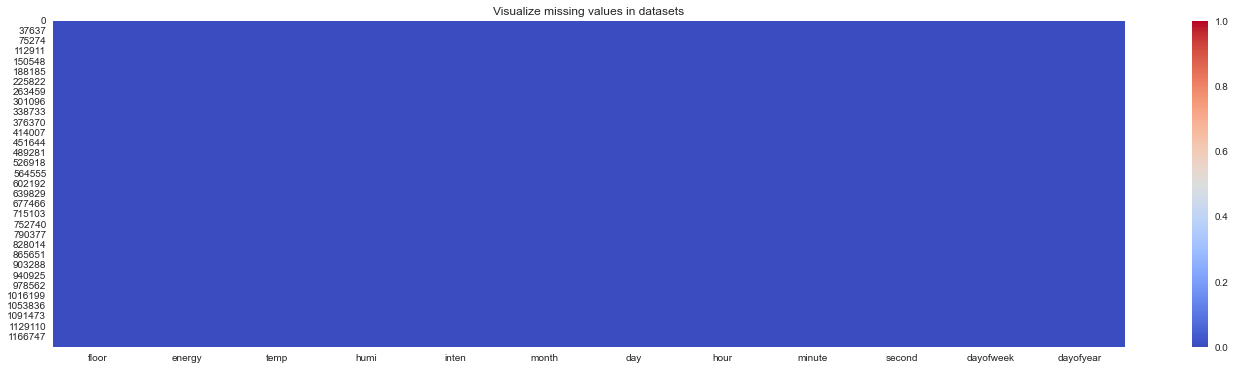

In [7]:
plt.figure(figsize=(24, 6))
sns.heatmap(df.isnull(), cmap='coolwarm');
plt.title('Visualize missing values in datasets');

In [8]:
from datetime import datetime, timedelta

def end_of_month(month, year):
    month = int(month) 
    if month == 12:
        next_month = 1
        next_year = year + 1
    else:
        next_month = month + 1
        next_year = year

    # Calculate the first day of the next month
    first_day_of_next_month = datetime(next_year, next_month, 1)

    # Subtract 1 day to get the last day of the current month
    end_of_month = first_day_of_next_month - timedelta(days=1)
    return end_of_month.day

year = 2023
df['eom'] = df.apply(lambda row: end_of_month(row['month'], year), axis=1)


In [9]:
df['hourmin']= df['hour'] + (df['minute']/60)
df['hourx'] = np.sin((360/24)*df['hourmin'])
df['houry'] = np.cos((360/24)*df['hourmin'])
df['dayx'] = np.sin((360/df['eom']) * df['day'])
df['dayy'] = np.cos((360/df['eom']) * df['day'])
df['monthx'] = np.sin((360/12)* df['month'])
df['monthy'] = np.cos((360/12)* df['month'])
df.sample(10)

,floor,energy,temp,humi,inten,month,day,hour,minute,second,dayofweek,dayofyear,eom,hourmin,hourx,houry,dayx,dayy,monthx,monthy
396772,3,3.659,30.13,74.42,0.00,10,2,18,59,0,6,275,31,18.983333,0.906505,-0.422195,-0.944035,-0.329844,-0.999756,-0.022097
120279,3,740.642,23.89,51.30,21.00,9,23,15,41,0,4,266,30,15.683333,0.361102,-0.932526,-0.444086,0.895984,-0.176046,0.984382
573602,7,530.881,25.86,67.79,71.33,10,3,14,9,0,0,276,31,14.150000,-0.981530,0.191309,-0.277500,-0.960726,-0.999756,-0.022097
1155037,6,37.255,28.97,52.44,0.75,12,25,18,14,0,6,359,31,18.233333,-0.180445,-0.983585,0.962496,0.271297,0.958916,-0.283691
663302,2,74.971,26.33,42.20,0.00,11,4,14,10,0,4,308,30,14.166667,-0.903686,0.428196,-0.768255,-0.640144,-0.132382,-0.991199
268290,7,65.648,30.80,74.33,0.00,9,4,7,35,0,6,247,30,7.583333,0.607305,0.794468,-0.768255,-0.640144,-0.176046,0.984382
681654,2,5.790,30.10,70.42,0.00,11,17,11,2,0,3,321,30,11.033333,0.843846,-0.536586,0.202120,-0.979361,-0.132382,-0.991199
954786,1,16.338,27.61,46.18,30.00,12,26,17,52,0,0,360,31,17.866667,-0.821835,-0.569726,0.335927,0.941888,0.958916,-0.283691
952833,1,3.971,27.63,57.67,0.00,12,25,9,19,0,6,359,31,9.316667,0.998706,0.050851,0.962496,0.271297,0.958916,-0.283691
173238,4,14.811,26.95,74.86,0.00,9,30,0,22,0,4,273,30,0.366667,-0.705540,0.708670,0.958916,-0.283691,-0.176046,0.984382


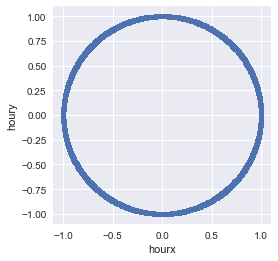

In [10]:
ax = df.plot.scatter('hourx', 'houry').set_aspect('equal')

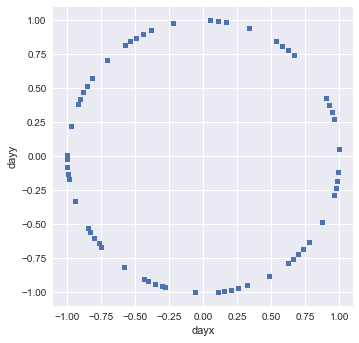

In [98]:
ax = df.plot.scatter('dayx', 'dayy').set_aspect('equal')

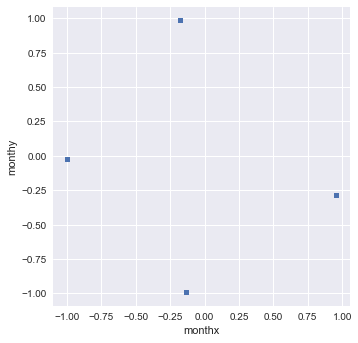

In [99]:
ax = df.plot.scatter('monthx', 'monthy').set_aspect('equal')

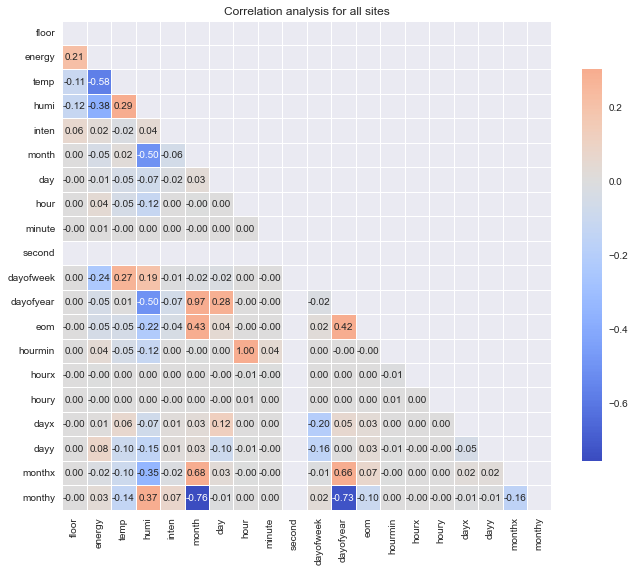

In [11]:
df_corr = df[df.columns.tolist()].corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis for all sites')
plt.show()

In [13]:
select = ['floor','energy','dayofweek','dayofyear',
          'hourmin','hourx','houry','dayx','dayy','monthx','monthy']

df_select = df[select].reset_index(drop=True)
df_select.sample(10)

,floor,energy,dayofweek,dayofyear,hourmin,hourx,houry,dayx,dayy,monthx,monthy
440433,4,11.429,6,275,14.666667,0.088399,0.996085,-0.944035,-0.329844,-0.999756,-0.022097
325605,1,3.505,4,287,11.866667,0.877575,-0.479439,-0.704822,0.709384,-0.999756,-0.022097
121334,3,19.262,5,267,10.266667,-0.061920,-0.998081,-0.855504,0.517796,-0.176046,0.984382
453573,4,14.172,1,284,20.666667,0.850888,-0.525348,0.873995,-0.485935,-0.999756,-0.022097
1187561,7,227.542,1,354,7.900000,-0.771071,0.636750,-0.218026,0.975943,0.958916,-0.283691
657716,1,10.734,3,335,8.066667,0.998815,-0.048664,-0.815428,0.578859,0.958916,-0.283691
115004,3,7.515,0,262,22.766667,0.803766,-0.594945,0.972623,-0.232388,-0.176046,0.984382
1012564,3,50.448,3,342,8.433333,0.742164,0.670218,-0.974516,0.224317,0.958916,-0.283691
6826,1,8.621,0,248,17.766667,0.510164,-0.860077,-0.304811,-0.952413,-0.176046,0.984382
970581,2,4.233,2,341,5.133333,0.999520,-0.030975,-0.381193,0.924495,0.958916,-0.283691


In [14]:
target_label = 'energy'
features = list(set(select).difference(set([target_label])))
features

['dayofweek',
 'dayofyear',
 'hourmin',
 'monthx',
 'floor',
 'houry',
 'dayy',
 'monthy',
 'hourx',
 'dayx']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_select[features].reset_index(drop=True)
y = df_select[target_label]

select = ['dayofweek', 'dayofyear', 'hourx', 'houry', 'dayx', 'monthy', 'monthx', 'hourmin', 'floor', 'dayy']

scaler = MinMaxScaler(feature_range=(0, 1))
X[select] = scaler.fit_transform(X[select])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting (Lightgbm)

In [16]:
import optuna
import lightgbm as lgb
from optuna_dashboard import run_server
from sklearn.metrics import mean_squared_error

In [17]:
n_estimators_list = [int(50*x) for x in range(2, 30)]

learning_rate_list = [round(x/500, 4) for x in range(2, 25)]

max_depth_list = [int(x) for x in range(3, 13)]
max_depth_list.append(-1)

n_leaves_list = [int(50*x) for x in range(2, 30)]

feature_fraction_list = [x/10 for x in range(1, 10)]

objective_list = ['rmse', 'mae', 'mape'] 

In [18]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'learning_rate': trial.suggest_categorical('learning_rate', learning_rate_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'num_leaves': trial.suggest_categorical('num_leaves', n_leaves_list),
        'feature_fraction': trial.suggest_categorical('feature_fraction', feature_fraction_list),
        'objective': trial.suggest_categorical('objective', objective_list),
        'random_state': 42
    }

    # Train the LightGBM model with the hyperparameters
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=10, show_progress_bar=True)


[I 2023-08-02 21:37:16,756] A new study created in memory with name: no-name-e336d5db-2f3b-4902-b2ad-a9b6076f0d44


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] Some label values are < 1 in absolute value. MAPE is unstable with such values, so LightGBM rounds them to 1.0 when calculating MAPE.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 963493, number of used features: 10
[LightGBM] [Info] Start training from score 6.949000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [19]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 400, 'learning_rate': 0.038, 'max_depth': 9, 'num_leaves': 900, 'feature_fraction': 0.8, 'objective': 'rmse'}
Best value: 83.22170423102538
Best trial:  [FrozenTrial(number=1, state=TrialState.COMPLETE, values=[83.22170423102538], datetime_start=datetime.datetime(2023, 8, 2, 21, 40, 54, 716606), datetime_complete=datetime.datetime(2023, 8, 2, 21, 41, 17, 960834), params={'n_estimators': 400, 'learning_rate': 0.038, 'max_depth': 9, 'num_leaves': 900, 'feature_fraction': 0.8, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042, 0.044, 

In [20]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_lgbm.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_lgbm.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'lgbm_model.pkl')

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 963493, number of used features: 10
[LightGBM] [Info] Start training from score 150.008073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

['lgbm_model.pkl']

RandomForestRegressor

In [21]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from optuna_dashboard import run_server
from sklearn.metrics import mean_squared_error

In [22]:
n_estimators_list = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features_list = ['auto', 'sqrt']

max_depth_list = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth_list.append(None)

min_samples_split_list = [2, 5, 10]

min_samples_leaf_list = [1, 2, 4]

bootstrap_list = [True, False]

In [ ]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'max_features': trial.suggest_categorical('max_features', max_features_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'min_samples_split': trial.suggest_categorical('min_samples_split', min_samples_split_list),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', min_samples_leaf_list),
        'bootstrap': trial.suggest_categorical('bootstrap', bootstrap_list),
        'random_state': 42
    }

    # Train the Random Forest model with the hyperparameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=10)

In [ ]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

In [ ]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_rf.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_rf.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'rf_model.pkl')

rmse :  1.017096873830002


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


['rf_model.pkl']

ElasticNet : linear regression model

In [24]:
import optuna
from sklearn.linear_model import ElasticNet
from optuna_dashboard import run_server
from sklearn.metrics import mean_squared_error

In [25]:
def objective(trial):
    # Define the hyperparameters to optimize
    alpha = trial.suggest_float('alpha', 0.001, 1.0)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    # Create an instance of ElasticNet with the suggested hyperparameters
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

[I 2023-08-02 22:10:37,663] A new study created in memory with name: no-name-69e17369-9218-4db5-bcb1-0d1d73843bb1
[I 2023-08-02 22:10:37,953] Trial 0 finished with value: 275.8045201236042 and parameters: {'alpha': 0.5758923041428696, 'l1_ratio': 0.48856919772479823}. Best is trial 0 with value: 275.8045201236042.
[I 2023-08-02 22:10:38,321] Trial 1 finished with value: 267.33614674431124 and parameters: {'alpha': 0.27804783677870254, 'l1_ratio': 0.9770587822674253}. Best is trial 1 with value: 267.33614674431124.
[I 2023-08-02 22:10:38,637] Trial 2 finished with value: 269.1801937810407 and parameters: {'alpha': 0.9076510665410332, 'l1_ratio': 0.9470486039290867}. Best is trial 1 with value: 267.33614674431124.
[I 2023-08-02 22:10:38,966] Trial 3 finished with value: 267.79515178138377 and parameters: {'alpha': 0.5983727613539058, 'l1_ratio': 0.9687181204932358}. Best is trial 1 with value: 267.33614674431124.
[I 2023-08-02 22:10:39,296] Trial 4 finished with value: 276.3977416806394 

In [26]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'alpha': 0.0024260948882015576, 'l1_ratio': 0.8644555256834211}
Best value: 267.20831557092197
Best trial:  [FrozenTrial(number=61, state=TrialState.COMPLETE, values=[267.20831557092197], datetime_start=datetime.datetime(2023, 8, 2, 22, 11, 19, 842590), datetime_complete=datetime.datetime(2023, 8, 2, 22, 11, 21, 366296), params={'alpha': 0.0024260948882015576, 'l1_ratio': 0.8644555256834211}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'alpha': FloatDistribution(high=1.0, log=False, low=0.001, step=None), 'l1_ratio': FloatDistribution(high=1.0, log=False, low=0.0, step=None)}, trial_id=61, value=None)]


In [27]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_eras.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_eras.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = ElasticNet(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'eras_model.pkl')

rmse :  267.20831557092197


['eras_model.pkl']

Xgboosting

In [30]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from optuna_dashboard import run_server

In [32]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
            'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'num_leaves': trial.suggest_int('num_leaves', 10, 500),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror'  # Set the objective function for regression
        }

    # Train the XGBoost model with the hyperparameters
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=10)

[I 2023-08-02 22:12:52,104] A new study created in memory with name: no-name-7a39d1a0-5a31-448c-9308-3f03397ccdfe
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:12:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:18:06,967] Trial 0 finished with value: 87.25957665739656 and parameters: {'n_estimators': 1388, 'learning_rate': 0.36644195576619815, 'max_depth': 6, 'num_leaves': 108, 'colsample_bytree': 0.5762131142098481}. Best is trial 0 with value: 87.25957665739656.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:22:39,834] Trial 1 finished with value: 71.1304377572809 and parameters: {'n_estimators': 683, 'learning_rate': 0.3095475780234022, 'max_depth': 7, 'num_leaves': 79, 'colsample_bytree': 0.9406034749017271}. Best is trial 1 with value: 71.1304377572809.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:22:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:24:52,779] Trial 2 finished with value: 119.30774235645481 and parameters: {'n_estimators': 829, 'learning_rate': 0.4433186182498993, 'max_depth': 3, 'num_leaves': 342, 'colsample_bytree': 0.9127573689742767}. Best is trial 1 with value: 71.1304377572809.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:24:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:34:01,792] Trial 3 finished with value: 62.88685760904179 and parameters: {'n_estimators': 1130, 'learning_rate': 0.2388254087614647, 'max_depth': 8, 'num_leaves': 305, 'colsample_bytree': 0.9214429341824587}. Best is trial 3 with value: 62.88685760904179.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:37:03,631] Trial 4 finished with value: 89.34784265653002 and parameters: {'n_estimators': 711, 'learning_rate': 0.47393744813503097, 'max_depth': 5, 'num_leaves': 63, 'colsample_bytree': 0.9452377057445025}. Best is trial 3 with value: 62.88685760904179.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:37:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:39:52,965] Trial 5 finished with value: 98.22083466187364 and parameters: {'n_estimators': 970, 'learning_rate': 0.4617961717033532, 'max_depth': 5, 'num_leaves': 399, 'colsample_bytree': 0.5969174352452421}. Best is trial 3 with value: 62.88685760904179.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:39:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:44:56,065] Trial 6 finished with value: 58.663431859018296 and parameters: {'n_estimators': 576, 'learning_rate': 0.2590095955473258, 'max_depth': 10, 'num_leaves': 158, 'colsample_bytree': 0.8298584673178445}. Best is trial 6 with value: 58.663431859018296.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:44:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:50:34,189] Trial 7 finished with value: 82.20477738185754 and parameters: {'n_estimators': 1255, 'learning_rate': 0.2787093453288868, 'max_depth': 7, 'num_leaves': 311, 'colsample_bytree': 0.590165577326377}. Best is trial 6 with value: 58.663431859018296.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:50:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:52:05,676] Trial 8 finished with value: 87.11647968373073 and parameters: {'n_estimators': 240, 'learning_rate': 0.40748213880114664, 'max_depth': 6, 'num_leaves': 435, 'colsample_bytree': 0.9699906043394231}. Best is trial 6 with value: 58.663431859018296.
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\ASUS\AppData\Local\Temp/ipykernel_21888/1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[22:52:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-08-02 22:56:33,955] Trial 9 finished with value: 68.6306852435244 and parameters: {'n_estimators': 536, 'learning_rate': 0.2030042264309366, 'max_depth': 8, 'num_leaves': 206, 'colsample_bytree': 0.9751863060291397}. Best is trial 6 with value: 58.663431859018296.


In [33]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 576, 'learning_rate': 0.2590095955473258, 'max_depth': 10, 'num_leaves': 158, 'colsample_bytree': 0.8298584673178445}
Best value: 58.663431859018296
Best trial:  [FrozenTrial(number=6, state=TrialState.COMPLETE, values=[58.663431859018296], datetime_start=datetime.datetime(2023, 8, 2, 22, 39, 52, 966719), datetime_complete=datetime.datetime(2023, 8, 2, 22, 44, 56, 65308), params={'n_estimators': 576, 'learning_rate': 0.2590095955473258, 'max_depth': 10, 'num_leaves': 158, 'colsample_bytree': 0.8298584673178445}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1500, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.5, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'num_leaves': IntDistribution(high=500, log=False, low=10, step=1), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None)}, trial_id=6, v

In [34]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_xgb.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_xgb.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'xgb_model.pkl')

[23:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

rmse :  58.663431859018296


['xgb_model.pkl']

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
window_size = 24  

inputs, outputs = [], []
for i in range(len(X) - window_size):
    inputs.append(X[i:i + window_size])  
    outputs.append(y[i + window_size]) 

In [ ]:
# Convert lists to NumPy arrays
inputs_np = np.array(inputs)
outputs_np = np.array(outputs)

test_size = 0.2

# Split the data into train and test sets using NumPy array slicing
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(inputs_np, outputs_np, test_size=test_size, random_state=42)

# Convert the train and test sets to PyTorch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

In [ ]:
print("X_train sahpe: ", X_train.shape)
print("Y_train sahpe: ", y_train.shape)
print("X_test sahpe: ", X_test.shape)
print("Y_test sahpe: ", y_test.shape)

X_train sahpe:  torch.Size([491879, 24, 13])
Y_train sahpe:  torch.Size([491879])
X_test sahpe:  torch.Size([122970, 24, 13])
Y_test sahpe:  torch.Size([122970])


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers  # Number of LSTM layers
        self.dropout = dropout  # Dropout rate

        # Define the LSTM layer(s)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)

        # Define the output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [ ]:

# Create DataLoader for training and testing data
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
def evaluate_model_rmse(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

    return total_loss / len(test_loader)

def rmse_loss(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred)**2))

In [ ]:
# Set the device to use (e.g., 'cuda' for GPU or 'cpu' for CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the number of epochs for training
num_epochs = 10

# Set the fixed hyperparameters
input_dim = X_train.shape[2]  # Input dimension for the LSTM (features of the input data)
hidden_dim = 128  # Fixed hidden dimension for the LSTM layer
output_dim = 1  # Output dimension (1 for regression)
num_layers = 3  # Number of LSTM layers
dropout = 0.5  # Dropout rate
batch_size = 64  # Batch size for training

# Create the LSTM model
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers, dropout).to(device)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = rmse_loss

In [ ]:
# Lists to store the training history
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluate on the test dataset
    model.eval()
    test_loss = evaluate_model_rmse(model, test_loader, criterion, device)
    test_losses.append(test_loss)

    # Display progress bar
    progress = (epoch + 1) / num_epochs * 100
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f} - {progress:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'lstm_model.pth')

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on the test dataset
model.eval()
test_loss = evaluate_model_rmse(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}')